In [1]:
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

np.seterr(all="ignore")

from threeML import *
from threeML.io.package_data import get_path_of_data_file
from threeML.io import update_logging_level
from threeML.utils.data_download.Fermi_LAT.download_LAT_data import LAT_dataset
from astropy.io import fits as pyfits

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


# This if you want to toggle different type of logging level.
update_logging_level("INFO")
log.error("error")
log.info("info")
log.debug("debug")

20:06:21 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=116239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=50638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=418746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=554844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=490939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=42744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

20:06:24 ERROR     error                                                                           ]8;id=993220;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_71442/3699701126.py\3699701126.py]8;;\:]8;id=820334;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_71442/3699701126.py#29\29]8;;\

         INFO      info                                                                            ]8;id=871183;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_71442/3699701126.py\3699701126.py]8;;\:]8;id=214803;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_71442/3699701126.py#30\30]8;;\

## GtBurst
Gtburst contains all the classes and methods to perform Fermi LAT data. It internally uses the official fermitools software. Here an example to list the IRFS available:


In [2]:
from GtBurst import IRFS

irfs = IRFS.IRFS.keys()
print(irfs)

odict_keys(['p7rep_transient', 'p7rep_source', 'p7rep_clean', 'p7rep_ultraclean', 'p8r2_transient100e', 'p8r2_transient100', 'p8r2_transient020e', 'p8r2_transient020', 'p8r2_transient010e', 'p8r2_transient010', 'p8r2_source', 'p8r2_clean', 'p8r2_ultraclean', 'p8r2_ultracleanveto', 'p8r2_transient100s', 'p8r2_transient015s', 'p8_transient100e', 'p8_transient100', 'p8_transient020e', 'p8_transient020', 'p8_transient010e', 'p8_transient010', 'p8_source', 'p8_clean', 'p8_ultraclean', 'p8_ultracleanveto', 'p8_sourceveto', 'p8_transient100s', 'p8_transient015s'])


## The LAT Transient Builder
Let's see how to make a plug in for the unbinned analysis of Fermi LAT data. First we use the information form a triggered GRB to obtain MET, RA and DEC, that are needed for the analysis.


In [3]:
from GtBurst.TriggerSelector import TriggerSelector

myFavoriteGRB = "bn190114873"


def findGRB(grb_name):
    a = TriggerSelector()
    a.downloadList()
    myGRB = {}
    for x in a.data:
        if x[0] == myFavoriteGRB:
            myGRB["MET"] = float(x[1])
            myGRB["RA"] = float(x[3])
            myGRB["DEC"] = float(x[4])
            myGRB["ERR"] = float(x[5])
            return myGRB
            pass
    return None

In [4]:
myGRB = findGRB(myFavoriteGRB)
print(myGRB)

{'MET': 569192227.626, 'RA': 54.51, 'DEC': -26.939, 'ERR': 0.05}


Then, we download LAT data and we build the transient builder, we want to analyze 1000 seconds since the trigger. Let's start download the data:


In [5]:
tstart = 0
tstop = 1000

In [6]:
myLATdataset = LAT_dataset()

myLATdataset.make_LAT_dataset(
    ra=myGRB["RA"],
    dec=myGRB["DEC"],
    radius=12,
    trigger_time=myGRB["MET"],
    tstart=tstart,
    tstop=tstop,
    data_type="Extended",
    destination_directory=".",
    Emin=100.0,
    Emax=10000.0,
)  # Energies are MeV (this is from 100 MeV to 10 GeV)

20:06:35 INFO      Query parameters:                                                       ]8;id=62918;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=51040;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#262\262]8;;\

         INFO                          coordfield = 54.5100,-26.9390                       ]8;id=547752;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=196278;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         coordsystem = J2000                                  ]8;id=885863;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=114904;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          shapefield = 12                                     ]8;id=259803;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=69963;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                           timefield = 569192227.626,569193227.626            ]8;id=577979;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=791928;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                            timetype = MET                                    ]8;id=866686;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=360426;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         energyfield = 100.000,10000.000                      ]8;id=862195;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=39242;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO              photonOrExtendedOrNone = Extended                               ]8;id=33351;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=318338;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         destination = query                                  ]8;id=790242;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=424876;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          spacecraft = checked                                ]8;id=100001;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=898580;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO      Query ID: 86ad4d2b3b3e5065f0f0a976e6fc8315                              ]8;id=114160;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=562390;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#271\271]8;;\

20:06:36 INFO      Estimated complete time for your query: 15 seconds                      ]8;id=442786;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=912120;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#427\427]8;;\

         INFO      If this download fails, you can find your data at                       ]8;id=109165;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=865369;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#436\436]8;;\
                  https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L2210041                         
                  60637B4ACFA2F06 (when ready)                                                                     

20:06:42 INFO      Downloading FT1 and FT2 files...                                        ]8;id=948684;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=652057;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#526\526]8;;\

20:06:46 WARNING   Only one FT1 file provided. Skipping the merge...                        ]8;id=98071;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=110909;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#98\98]8;;\

Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.rsp...
time -p gtselect infile=./bn190114873/gll_ft1_tr_bn190114873_v00.fit outfile=__temp_ft1.fits ra=54.51 dec=-26.939 rad=15.0 tmin=569192226.626 tmax=569193228.626 emin=10.0 emax=300000.0 zmin=0.0 zmax=110.0 evclass="INDEF" evtype="INDEF" convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.14
user 0.09
sys 0.03
Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.pha...
 *  Get energy binning from the response matrix...

    done.

 *  Run gtbindef and gtbin and bin in energy and time...

time -p gtbindef bintype="E" binfile=__ebins.txt outfile=__energyBins.fits energyunits="keV" chatter=2 clobber=yes debug=no gui=no mode="ql"


This is gtbindef version HEAD
real 0.19
user 0.01
sys 0.02
time -p gtbin evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/__temp_ft1.fits scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=__gtllebin__pha2.pha algorithm="PHA2" ebinalg="FILE" emin=30.0 emax=200000.0 ebinfile=__energyBins.fits tbinalg="LIN" tstart=569192227.626 tstop=569193227.626 dtime=4.096 tbinfile=NONE coordsys="CEL" axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=1 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD


real 2.92
user 2.48
sys 0.42

    done.

 *  Transform gtbin output in CSPEC format...

    done.

 *  Updating keywords in the headers of the CSPEC file...

    done.

gtllebin done!


We want perform a time resolved analysis. So, first we look at the data. We can play with the ROI selection and the cut.


In [7]:
roi = 10
zmax = 110.0
thetamax = 180.0
irfs = "p8_transient020e"
strategy = "time"
myLATdataset.extract_events(roi, zmax, irfs, thetamax, strategy="time")

time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit evtable="EVENTS" outfile="gll_ft1_tr_bn190114873_v00_mkt.fit" apply_filter=yes overwrite=no header_obstimes=yes tstart=569192227.626 tstop=569193227.626 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 0.10
user 0.06
sys 0.03

Using 305 data

time -p gtselect infile=gll_ft1_tr_bn190114873_v00_mkt.fit outfile=gll_ft1_tr_bn190114873_v00_filt.fit ra=54.51 dec=-26.939 rad=10.0 tmin=569192227.626 tmax=569193227.626 emin=100.0 emax=10000.0 zmin=0.0 zmax=110.0 evclass=8 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=

Done.
real 0.15
user 0.10
sys 0.03

Selected 251 events.


20:06:50 INFO      Extracted 251 events                                                    ]8;id=573900;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=130287;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#669\669]8;;\

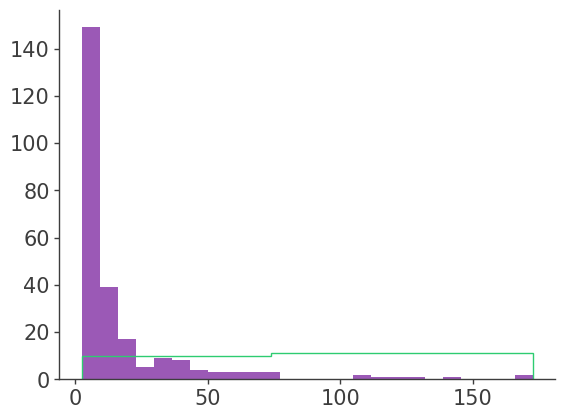

In [8]:
%matplotlib inline
event_file = pyfits.open(myLATdataset.filt_file)
event_times = sorted(event_file["EVENTS"].data["TIME"] - myGRB["MET"])
intervals = event_times[0::10]
_ = plt.hist(event_times)
_ = plt.hist(event_times, intervals, histtype="step")
# plt.show()

tstarts and tstops are defined as strings, with somma separated values for the starts and the ends of the time bins: For example tsrats="0,1,10" and tstops="1,10,20". To convert arrays in string we use these few lines of code:


In [9]:
tstarts = tstops = ""
for t0, t1 in zip(intervals[:-1], intervals[1:]):
    tstarts += "%.4f," % t0
    tstops += "%.4f," % t1
    pass
tstarts = tstarts[:-1].replace("-", "\\-")
tstops = tstops[:-1].replace("-", "\\-")

We can now make an instance the LAT transient builder


In [10]:
analysis_builder = TransientLATDataBuilder(
    myLATdataset.grb_name,
    outfile=myLATdataset.grb_name,
    roi=roi,
    tstarts=tstarts,
    tstops=tstops,
    irf=irfs,
    zmax=zmax,
    galactic_model="template",
    particle_model="isotr template",
    datarepository=".",
)
df = analysis_builder.display(get=True)

outfile                                                       190114873
roi                                                                  10
tstarts               2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.54...
tstops                3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.98...
zmax                                                              110.0
emin                                                              100.0
emax                                                           100000.0
irf                                                    p8_transient020e
galactic_model                                                 template
particle_model                                           isotr template
source_model                                                  PowerLaw2
tsmin                                                              20.0
strategy                                                           time
thetamax                                                        

In [11]:
tstops

'3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754'

The run method will run (using gtburst) all the fermitools needed to obtain the needed file for the likelihood analysis (livetimecubes, exposure maps. It will also perfom a simple likelihood analysis with the standard likelihood of the fermitools (pylikelihood). The dataproducts created here will be used by threeML to make the fit.


In [12]:
LAT_observations = analysis_builder.run(include_previous_intervals=True)

Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/scripts/doTimeResolvedLike.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtdiffrsp_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtltcube_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gttsmap_mp.py


         INFO      About to run the following command:                                 ]8;id=223947;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=443446;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#636\636]8;;\
                  /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermi                             
                  tools/GtBurst/scripts/doTimeResolvedLike.py 190114873 --outfile                                  
                  '190114873' --roi 10.000000 --tstarts                                                            
                  '2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.68                             
                  89,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165                             
                  ,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262' --tstops                                       
                  '3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.01                             
                  17,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.783                             
                  4,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754' --zmax                                       
                  110.000000 --emin 100.000000 --emax 100000.000000 --irf                                          
                  'p8_transient020e' --galactic_model 'template' --particle_model                                  
                  'isotr template' --source_model 'PowerLaw2' --tsmin 20.000000                                    
                  --strategy 'time' --thetamax 180.000000 --spectralfiles 'no'                                     
                  --liketype 'unbinned' --optimizeposition 'no' --datarepository '.'                               
                  --ltcube '' --expomap '' --ulphindex -2.000000 --flemin 100.000000                               
                  --flemax 10000.000000 --fgl_mode 'fast'                                                          

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   25.19240     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .29E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:54: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.71579     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .58E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA


Requested intervals:
------------------------------------------------------
2.6996               - 3.6358
3.6358               - 3.9968
3.9968               - 4.4024
4.4024               - 4.7375
4.7375               - 5.0909
5.0909               - 5.5471
5.5471               - 5.9896
5.9896               - 6.3998
6.3998               - 6.6889
6.6889               - 7.0117
7.0117               - 7.2936
7.2936               - 7.7731
7.7731               - 8.2167
8.2167               - 8.8763
8.8763               - 9.6573
9.6573               - 10.568
10.568               - 12.0568
12.0568              - 14.6165
14.6165              - 17.7834
17.7834              - 21.4962
21.4962              - 30.0798
30.0798              - 40.8747
40.8747              - 48.7118
48.7118              - 73.7262
73.7262              - 172.5754

Data files:
-----------
eventfile            /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit
ft2file      

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   4.786573     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   5.901543     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .70E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_3.6358-3.9968.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=no mode="ql"
adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 8.98
user 8.04
sys 0.83
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.43105     FROM MIGRAD    STATUS=CONVERGED     67 CALLS       68 TOTAL
                     EDM=   .19E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   11.37565     FROM MIGRAD    STATUS=CONVERGED     74 CALLS       75 TOTAL
                     EDM=   .16E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  9.4%

  EXT PARAMETER                            

Total time in Good Time Intervals:        0.3350999355316162
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_4.4024-4.7375.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_4.4024-4.7375.xml 0.3350999355316162 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using template /usr/local/miniconda/envs

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   7.632503     FROM MIGRAD    STATUS=CONVERGED     61 CALLS       62 TOTAL
                     EDM=   .99E-06  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  5.3%

  EXT PARAMETER                            

time -p gtsrcprob evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval4.7375-5.0909/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" outfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval4.7375-5.0909/gll_ft1_tr_bn190114873_v00_filt_prob.fit srcmdl=gll_ft1_tr_bn190114873_v00_filt_likeRes.xml irfs="CALDB" evtype="INDEF" srclist= chatter=2 clobber=yes debug=no gui=no mode="ql"
real 6.99
user 6.18
sys 0.75


Interval # 6 (5.0909-5.5471):
-----------------------

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_5.0909-5.5471.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn19011

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   10.79486     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .15E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   6.844639     FROM MIGRAD    STATUS=CONVERGED     66 CALLS       67 TOTAL
                     EDM=   .31E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 8.61
user 7.82
sys 0.74
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit
Spacecraft file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit
Exposure map: gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Exposure cube: gll_ft1_tr_bn190114873_v00_filt_ltcube.fit
IRFs: P8R3_TRANSIENT020E_V3
Source model file: 190114873_LAT_xmlmodel_5.5471-5.9896.xml
Optimizer: Minuit

Performing likelihood fit...
Data  10.0
srcName  2.576925063095601e-06
srcName  10.000748366300273
srcName  0.0005360043373690395
srcName  0.00012916130

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   8.317516     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .68E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   12.58093     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .10E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig = plt.figure()


Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using spatial model SpatialMap...
Kept 1 point sources from the FGL catalog
-> gtdolike.py spectralfiles='no' xmlmodel='190114873_LAT_xmlmodel_6.3998-6.6889.xml' liketype='unbinned' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' showmodelimage='no' tsmin='20.0' optimizeposition='no' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' skymap='190114873_LAT_skymap_6.3998-6.6889.fit' flemin='100.000000' flemax='10000.000000'
time -p gtltcube evfile="/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval6.3998-6.6889/gll_ft1_tr_bn190114873_v00_filt.fit" evtable="EVENTS" scfile=__ft2temp.fits sctable="SC_DATA" outfile=gll_ft1_tr_bn190114873_v00_filt_ltcube.fit dcostheta=0.025 binsz=1.0 phibins=1 tmin=0.0 tmax=0.0 file_version="1" zmin

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   18.30164     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

user 0.06
sys 0.03

Using 305 data

time -p gtselect infile=gll_ft1_tr_bn190114873_v00_mkt.fit outfile=gll_ft1_tr_bn190114873_v00_filt.fit ra=54.51 dec=-26.939 rad=10.0 tmin=569192234.6377001 tmax=569192234.9196 emin=100.0 emax=100000.0 zmin=0.0 zmax=110.0 evclass=8 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.12
user 0.09
sys 0.03

Selected 10 events.
time -p gtbin evfile=gll_ft1_tr_bn190114873_v00_filt.fit scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=190114873_LAT_skymap_7.0117-7.2936.fit algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=101 nypix=101 binsz=0.2 coordsys="CEL" xref=54.51 yref=-26.939 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" ch

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   14.90094     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .44E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   13.18701     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .24E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.5%

  EXT PARAMETER                            

|--------------------|---------------|----------|  ----------|----------|------|
|         Source name|      Par. Name|     Value|       Error|     Units|    TS|
|--------------------|---------------|----------|------------|----------|------|
|GRB                 |               |          |            |          |   152|
|                    |       Integral|    0.0136|     0.00442| ph./cm2/s|      |
|                    |          Index|     -1.82|        0.31|         -|      |
|                    |     LowerLimit|       100|n.a. (fixed)|       MeV|      |
|                    |     UpperLimit|     1e+05|n.a. (fixed)|       MeV|      |
|                    |    Energy flux|  1.29e-05|    7.79e-06| erg/cm2/s|      |
|                    |    Photon flux|    0.0134|     0.00427| ph./cm2/s|      |
|GalacticTemplate    |               |          |            |          |     0|
|                    |          Value|         1|        0.15|         -|      |
|                    |    En

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   24.59086     FROM MIGRAD    STATUS=CONVERGED     57 CALLS       58 TOTAL
                     EDM=   .13E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   28.24928     FROM MIGRAD    STATUS=CONVERGED     56 CALLS       57 TOTAL
                     EDM=   .18E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py 40 40 2 1 /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval8.2167-8.8763/gll_ft1_tr_bn190114873_v00_filt.fit gll_ft1_tr_bn190114873_v00_filt_ltcube.fit P8R3_TRANSIENT020E_V3 20.0 20 gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Starting calculation of region 20.0,0.0 to 40.0,40.0

Completed calculation of region 20.0,0.0 to 40.0,40.0

Starting calculation of region 0.0,0.0 to 20.0,40.0

Completed calculation of region 0.0,0.0 to 20.0,40.0

Spawning 2 jobs...

Combining temporary files...

Deleting temporary files...



time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval8.2167-8.8763/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_f

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   29.59265     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .12E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtbin evfile=gll_ft1_tr_bn190114873_v00_filt.fit scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=190114873_LAT_skymap_9.6573-10.568.fit algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=101 nypix=101 binsz=0.2 coordsys="CEL" xref=54.51 yref=-26.939 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
real 0.19
user 0.15
sys 0.03

Total number of events in the counts map: 10
Total time in Good Time Intervals:        0.9106999635696411
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_9.6573-10.568.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' 

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   30.55516     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .11E-04  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.1%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   29.31981     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .64E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  3.9%

  EXT PARAMETER                            

|--------------------|---------------|----------|  ----------|----------|------|
|         Source name|      Par. Name|     Value|       Error|     Units|    TS|
|--------------------|---------------|----------|------------|----------|------|
|GRB                 |               |          |            |          |   145|
|                    |       Integral|   0.00414|     0.00131| ph./cm2/s|      |
|                    |          Index|     -1.47|       0.274|         -|      |
|                    |     LowerLimit|       100|n.a. (fixed)|       MeV|      |
|                    |     UpperLimit|     1e+05|n.a. (fixed)|       MeV|      |
|                    |    Energy flux|  6.43e-06|    3.07e-06| erg/cm2/s|      |
|                    |    Photon flux|   0.00381|     0.00126| ph./cm2/s|      |
|GalacticTemplate    |               |          |            |          |     1|
|                    |          Value|         1|       0.134|         -|      |
|                    |    En

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   38.58473     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .91E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  4.2%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   41.85635     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .15E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

user 0.38
sys 0.65
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py 40 40 2 1 /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval14.6165-17.7834/gll_ft1_tr_bn190114873_v00_filt.fit gll_ft1_tr_bn190114873_v00_filt_ltcube.fit P8R3_TRANSIENT020E_V3 20.0 20 gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Spawning 2 jobs...

Combining temporary files...

Deleting temporary files...



time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval14.6165-17.7834/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_14.6165-17.7834.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 c

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   40.63160     FROM MIGRAD    STATUS=CONVERGED     71 CALLS       72 TOTAL
                     EDM=   .94E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtbin evfile=gll_ft1_tr_bn190114873_v00_filt.fit scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=190114873_LAT_skymap_21.4962-30.0798.fit algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=101 nypix=101 binsz=0.2 coordsys="CEL" xref=54.51 yref=-26.939 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
real 0.41
user 0.18
sys 0.05

Total number of events in the counts map: 10
Total time in Good Time Intervals:        8.583600044250488
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_21.4962-30.0798.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fas

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   34.58971     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .11E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   51.56070     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

|--------------------|---------------|----------|  ----------|----------|------|
|         Source name|      Par. Name|     Value|       Error|     Units|    TS|
|--------------------|---------------|----------|------------|----------|------|
|GRB                 |               |          |            |          |   131|
|                    |       Integral|  0.000584|    0.000189| ph./cm2/s|      |
|                    |          Index|      -1.3|       0.266|         -|      |
|                    |     LowerLimit|       100|n.a. (fixed)|       MeV|      |
|                    |     UpperLimit|     1e+05|n.a. (fixed)|       MeV|      |
|                    |    Energy flux|  1.11e-06|    5.17e-07| erg/cm2/s|      |
|                    |    Photon flux|    0.0005|    0.000163| ph./cm2/s|      |
|GalacticTemplate    |               |          |            |          |     0|
|                    |          Value|         1|        0.15|         -|      |
|                    |    En

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   66.71287     FROM MIGRAD    STATUS=CONVERGED     64 CALLS       65 TOTAL
                     EDM=   .42E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

sys 0.94
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py 40 40 2 1 /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval48.7118-73.7262/gll_ft1_tr_bn190114873_v00_filt.fit gll_ft1_tr_bn190114873_v00_filt_ltcube.fit P8R3_TRANSIENT020E_V3 20.0 20 gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Spawning 2 jobs...

Combining temporary files...

Deleting temporary files...



time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval48.7118-73.7262/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_48.7118-73.7262.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes

20:29:12 INFO      The ft2 file does not exist. Please examine!                        ]8;id=535245;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=984793;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=2543;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=350999;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=722402;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=406064;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval10.568-12.0568/gll_ft2_tr_bn190114873_v00.fit                                            

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=475072;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=141871;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=36571;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=32893;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=809681;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=51947;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval12.0568-14.6165/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=89146;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=554642;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=105799;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=672455;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=878056;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=860320;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval14.6165-17.7834/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=676163;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=263260;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=975504;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=608378;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=429691;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=969004;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval17.7834-21.4962/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=508354;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=556500;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=450547;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=257199;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=427966;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=275352;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval2.6996-3.6358/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=397127;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=91574;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=450357;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=111850;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=716865;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=252142;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval21.4962-30.0798/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=501162;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=619464;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=873923;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=263570;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=740515;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=928226;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.6358-3.9968/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=538190;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=576927;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=874356;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=775146;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=14181;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=352714;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.9968-4.4024/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=150060;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=802365;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=76877;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=508259;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=467840;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=446074;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval30.0798-40.8747/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=308252;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=209121;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=429671;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=426008;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=84398;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=44143;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.4024-4.7375/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=952665;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=100068;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=501388;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=326051;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=364156;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=166483;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.7375-5.0909/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=190420;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=332002;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=891675;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=746021;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=94137;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=707211;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval40.8747-48.7118/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=367141;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=178475;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=750988;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=9853;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=611463;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=239630;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval48.7118-73.7262/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=360435;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=402066;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=905849;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=767402;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=49489;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=806294;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.0909-5.5471/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=851835;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=536789;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=239167;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=184624;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=743688;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=400852;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.5471-5.9896/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=632742;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=368825;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=450922;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=845137;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=991859;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=590826;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.9896-6.3998/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=968262;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=900311;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=708378;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=109282;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=617015;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=588806;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.3998-6.6889/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=579538;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=541926;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=281092;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=241304;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=501675;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=843683;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.6889-7.0117/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=217156;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=364667;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=728099;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=647481;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=991794;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=734602;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.0117-7.2936/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=367863;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=217111;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=261557;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=147546;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=374094;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=247662;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.2936-7.7731/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=301833;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=960143;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=994514;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=167590;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=853061;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=41031;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.7731-8.2167/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=514255;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=206089;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=71874;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=651637;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=442764;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=412505;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval73.7262-172.5754/gll_ft2_tr_bn190114873_v00.fit                                          

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=721636;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=36292;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=304324;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=200491;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=328004;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=175556;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.2167-8.8763/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=203782;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=457126;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=610066;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=78653;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=555647;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=266156;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.8763-9.6573/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=404030;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=850177;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=857453;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=310663;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=520627;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=914277;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval9.6573-10.568/gll_ft2_tr_bn190114873_v00.fit                                             

 At this point we can create the FermiLATLike plugins from each of the observation:

In [13]:
LAT_plugins = {}
for l in LAT_observations:
    LAT_name = "LAT_%06.3f-%06.3f" % (float(l.tstart), float(l.tstop))
    LAT_plugins[LAT_name] = l.to_LATLike()
    pass

For reference, these are the keys save in the dictionary.


In [14]:
LAT_plugins.keys()

dict_keys(['LAT_10.568-12.057', 'LAT_12.057-14.617', 'LAT_14.617-17.783', 'LAT_17.783-21.496', 'LAT_02.700-03.636', 'LAT_21.496-30.080', 'LAT_03.636-03.997', 'LAT_03.997-04.402', 'LAT_30.080-40.875', 'LAT_04.402-04.737', 'LAT_04.737-05.091', 'LAT_40.875-48.712', 'LAT_48.712-73.726', 'LAT_05.091-05.547', 'LAT_05.547-05.990', 'LAT_05.990-06.400', 'LAT_06.400-06.689', 'LAT_06.689-07.012', 'LAT_07.012-07.294', 'LAT_07.294-07.773', 'LAT_07.773-08.217', 'LAT_73.726-172.575', 'LAT_08.217-08.876', 'LAT_08.876-09.657', 'LAT_09.657-10.568'])

Now we can perform the fit in each bin. Note that we set the model, and we set some initial values. All the resulting joint likelihood objects are stored in a dictioonary to be used later for plotting.


In [15]:
results = {}
update_logging_level("DEBUG")

for T0, T1 in zip(intervals[:-1], intervals[1:]):
    GRB = PointSource(
        "GRB", ra=myGRB["RA"], dec=myGRB["DEC"], spectral_shape=Powerlaw_flux()
    )
    model = Model(GRB)
    model.GRB.spectrum.main.Powerlaw_flux.a = 100.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.b = 10000.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.F = 1.0
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    LAT_model_name = ("LAT%dX%d" % (T0, T1)).replace("-", "n")
    datalist = DataList(LAT_plugins[LAT_name])
    model["GRB.spectrum.main.Powerlaw_flux.F"].bounds = (1e-6, 1e6)
    model["GRB.spectrum.main.Powerlaw_flux.F"].value = 1e-2
    model["GRB.spectrum.main.Powerlaw_flux.index"].value = -2.2
    model["GRB.spectrum.main.Powerlaw_flux.index"].bounds = (-3, 0)
    jl = JointLikelihood(model, datalist, verbose=False)
    model[LAT_model_name + "_GalacticTemplate_Value"].value = 1.0
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    # model.display( complete=True )
    jl.set_minimizer("minuit")
    jl.fit(compute_covariance=True)
    results[LAT_name] = jl
    pass

20:29:22 DEBUG     adding child F                                                                   ]8;id=965259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=802803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=841401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=855985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=547006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=933879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=521573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=245141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=459090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=955533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=668041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=576981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=184194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=393667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=852339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=108518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=649657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=200928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=740407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=673613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=816537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=511780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=960327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=145827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=487458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=656474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=580460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

20:29:22 DEBUG     creating new MLE analysis                                                 ]8;id=758807;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=130137;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=296326;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=597431;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:29:41 DEBUG     Removing non-needed files                                                    ]8;id=585003;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=193973;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=630496;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=991890;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=888760;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=663384;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=840235;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=863934;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:29:41 DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=623149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=382278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=383785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=965734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=125759;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=442212;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=317343;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=957566;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=546120;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=989684;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=134828;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=698535;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=646968;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=233672;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=28002;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=579767;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.0352544023409047                      ]8;id=71177;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=122339;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.99999999999764                    ]8;id=109013;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=854276;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT2X3_IsotropicTemplate_Normalization = 1.4999999932566102                  ]8;id=186581;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=914609;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=290637;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=902473;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   75.5 percent of samples have been thrown away because they failed the   ]8;id=440068;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=571141;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=381762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=544028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=280490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=561782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=626678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=308630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=969376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=636042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=218498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=501548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=633636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=838944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=509791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=734126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=205459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=400376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=575910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=910508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=529281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=966367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=826563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=247005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=656568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=408547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=969207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=486386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=756249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=484768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (9.2 -2.5 +3.4) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index   -3.0000000 +/- 0.0000018             
LAT2X3_IsotropicTemplate_Normalization         1.5000 +/- 0.0022

Correlation matrix:

1.00  0.00 -0.00
 0.00  1.00 -0.00
-0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT2X3         40.674435
total          40.674435

Values of statistical measures:

statistical measures
AIC              79.34887
BIC              81.34887

         DEBUG     adding child F                                                                   ]8;id=685348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=488587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=181829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=331273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=531401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=703958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=561901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=676874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=681153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=357325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=20263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=295859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=51594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=510037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=510042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=617557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=862784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=774775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=798912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=877614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=47184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=604652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=390014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=518649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=604503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=456790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=766352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=272108;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=812744;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=911973;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=223766;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:29:56 DEBUG     Removing non-needed files                                                    ]8;id=216294;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=611987;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=40514;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=317274;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=788130;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=899376;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=482942;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=503312;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:29:56 DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=438194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=93076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=42838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=737805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=707681;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=694432;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=606756;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=421648;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=625063;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=213136;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=98653;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=761897;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=621173;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=18292;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=93781;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=650903;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6214002832513499                      ]8;id=262753;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=640069;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.999999990196391                   ]8;id=286709;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=142311;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X3_IsotropicTemplate_Normalization = 1.4999986085998898                  ]8;id=126685;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=747574;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=3420;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=847627;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   75.24 percent of samples have been thrown away because they failed the  ]8;id=643229;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=812368;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=760268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=728466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=33804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=429255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=717547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=150355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=943765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=395040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=987136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=513423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=220136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=133986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=804875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=821490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=397725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=625661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=427721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=823192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=307899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=544835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=533838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=688982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=609965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=167036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=718470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=306228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=207962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=640451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=341089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=542368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.4 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index      -3.00000 +/- 0.00010             
LAT3X3_IsotropicTemplate_Normalization          1.500 +/- 0.035

Correlation matrix:

1.00  0.00  0.00
0.00  1.00 -0.00
0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X3         29.524707
total          29.524707

Values of statistical measures:

statistical measures
AIC             57.049414
BIC             59.049414

         DEBUG     adding child F                                                                   ]8;id=299271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=514346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=921110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=609937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=310999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=610050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=245962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=799452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=365602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=268083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=824282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=663935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=682881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=664068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=170545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=406993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=417428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=773119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=773250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=169117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=241911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=775864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=840874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=343221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=832548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=579169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=748736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=691150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=802128;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=209138;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=911617;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=849094;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:30:13 DEBUG     Removing non-needed files                                                    ]8;id=849787;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=640584;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=108219;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=887157;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=917700;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=150699;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=3148;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=584264;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:30:13 DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=582727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=7706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=862454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=916691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=937993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=512462;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=640881;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=208608;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=506204;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=412378;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=95239;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=605063;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=657417;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=405911;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=440578;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=970130;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=672117;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6740288325393682                      ]8;id=825500;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=697600;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.9697989727745715                  ]8;id=805473;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=77240;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X4_IsotropicTemplate_Normalization = 0.5000002063664295                  ]8;id=65973;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=90908;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=426892;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=437096;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   74.18 percent of samples have been thrown away because they failed the  ]8;id=413066;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=762704;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=432732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=561719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=801259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=597374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=826372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=799803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=997022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=715248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=571343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=630190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=158020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=130463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=337654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=854311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=916931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=951356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=849918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=736293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=401357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=485636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=574458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=396035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=614559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=951976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=815265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=902168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=167316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=133387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=340124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=905985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.1 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -3.0 +/- 0.5             
LAT3X4_IsotropicTemplate_Normalization  (5.00 +/- 0.26) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X4         19.890601
total          19.890601

Values of statistical measures:

statistical measures
AIC             37.781202
BIC             39.781202

         DEBUG     adding child F                                                                   ]8;id=403091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=967049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=288116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=237873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=481311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=529180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=623159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=777879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=198144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=866498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=371696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=631126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=795696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=739851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=598267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=374805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=599353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=225638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=751435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=297996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=921427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=495907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=859904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=336962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=2581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=34919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=903058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=99588;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=267078;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=506966;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=828477;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:30:30 DEBUG     Removing non-needed files                                                    ]8;id=601201;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=987845;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

20:30:31 DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=715019;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=118374;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=899772;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=733018;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=448425;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=785651;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:30:31 DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=940840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=790535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=668823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=528208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=455323;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=277870;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=470812;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=970109;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=551089;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=436387;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=483849;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=157670;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=56359;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=516944;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=482371;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=119671;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6356358474267303                      ]8;id=631563;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=223102;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.493350750381729                   ]8;id=46740;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=822987;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X4_IsotropicTemplate_Normalization = 0.5000010514249715                  ]8;id=307311;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=789203;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=209961;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=267843;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   55.779999999999994 percent of samples have been thrown away because     ]8;id=691581;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=515631;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=678597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=557199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=912699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=69101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=880741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=795002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=581930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=296326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=622910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=507783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=522982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=924584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=902149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=32539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=696136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=134908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=929695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=122830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=831477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=56978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=541405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=965424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=193523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=215932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=789045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=968398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=275934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=205358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

         DEBUG     adding child F                                                                   ]8;id=818590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=312476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=910872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=192180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=770117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=80491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=318888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=732927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=149530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=256450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=37491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=120714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=120591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=613473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=70370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=556185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=99584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=692863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=599662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=653113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=413022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=981954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=259737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=941848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=101069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=790598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=94131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=460195;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=207806;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=977294;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=219614;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:30:47 DEBUG     Removing non-needed files                                                    ]8;id=392085;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=74900;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=167052;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=633596;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=343455;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=600520;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=765884;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=557646;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:30:47 DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=416998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=14768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=810693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=861049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=601710;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=411875;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=503889;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=950098;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=851376;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=515559;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=523057;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=116702;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=430565;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=566222;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=212961;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=570220;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6972341426974515                      ]8;id=614326;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=984373;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1561451176003112                  ]8;id=225961;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=371443;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X5_IsotropicTemplate_Normalization = 0.5000012928966517                  ]8;id=750320;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=44323;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=189160;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=636012;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.68 percent of samples have been thrown away because they failed the  ]8;id=576291;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=290730;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=828306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=784025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=232744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=170165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

20:30:48 DEBUG     adding child F                                                                   ]8;id=236273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=554558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=986702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=130040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=433284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=568996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=666221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=355177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=473764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=58188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=815760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=730372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=483802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=237632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=516630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=817653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=418136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=311588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=235031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=792702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=849362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=626365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=247694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=402333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=564050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.2 +/- 0.4             
LAT4X5_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X5          28.53492
total           28.53492

Values of statistical measures:

statistical measures
AIC              55.06984
BIC              57.06984

         DEBUG     adding child F                                                                   ]8;id=339928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=815042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=65357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=747848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=890450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=498728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=659650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=251627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=602730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=293952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=254035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=901669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=518799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=527974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=795350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=663075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=408405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=115081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=511802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=218718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=41627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=586847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=783918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=454607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=803856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=636741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=139080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

20:30:48 DEBUG     creating new MLE analysis                                                 ]8;id=982536;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=17288;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=863553;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=524520;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:31:06 DEBUG     Removing non-needed files                                                    ]8;id=553686;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=13482;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=976631;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=840120;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=371701;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=207696;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=168747;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=683251;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:31:06 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=14762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=805209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=868932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=621819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=905377;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=467289;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=215572;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=482584;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=931250;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=782836;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=55131;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=220522;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=808206;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=866885;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=58396;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=30770;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9618894075014957                      ]8;id=103949;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=139871;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3571830585982771                  ]8;id=619693;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=624673;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000000505896941                  ]8;id=554770;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=702016;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=522862;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=204694;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.019999999999996 percent of samples have been thrown away because     ]8;id=127403;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=267272;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=667502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=723957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=63339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=639710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=23037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=15025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=826097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=686101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=968221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=792450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=118317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=556995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=745981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=903111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=747019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=897275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=240204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=823015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=147997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=320687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=601136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=760538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=143989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=984197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=232757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=715863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=294508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=99052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=987118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=836241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.09 -0.32 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.36 +/- 0.28             
LAT5X5_IsotropicTemplate_Normalization    (5.00 +/- 0.14) x 10^-1

Correlation matrix:

1.00 -0.25  0.00
-0.25  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5          24.17769
total           24.17769

Values of statistical measures:

statistical measures
AIC             46.355381
BIC             48.355381

         DEBUG     adding child F                                                                   ]8;id=625966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=896213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=341960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=673694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=390725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=481312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=923583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=914024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=91399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=205903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=479955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=479000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=80393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=75353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=806073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=500679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=725651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=697440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=143365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=471828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=101176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=833847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=652353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=803484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=566039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=312377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=834712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=470826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=19589;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=388320;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=305907;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=131343;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:31:22 DEBUG     Removing non-needed files                                                    ]8;id=6993;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=931665;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=384776;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=415420;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=682486;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=147367;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=584668;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=567735;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:31:22 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=824337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=683838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=859243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=214097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=717983;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=55241;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=419530;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=304567;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=374029;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=19353;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=308648;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=331552;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=580123;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=325285;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=873436;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=671286;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7988486401117976                      ]8;id=660595;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=376215;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.124311369002779                   ]8;id=378631;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=57253;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000216811989323                  ]8;id=122496;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=686084;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=95151;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=588165;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.06 percent of samples have been thrown away because they failed the  ]8;id=696763;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=355221;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=682852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=531260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=772800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=123348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=151475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=202557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=248016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=412203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=143475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=592085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=300521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=121550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=763343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=619675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=416308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=105397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=130229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=127807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=680973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=268246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=700967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=745847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=343356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=553544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=785891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=571884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=110686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=119038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=94861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.6 -0.4 +0.6) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.1 +/- 0.4             
LAT5X5_IsotropicTemplate_Normalization    (5.0 +/- 2.2) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5         22.737285
total          22.737285

Values of statistical measures:

statistical measures
AIC             43.474569
BIC             45.474569

         DEBUG     adding child F                                                                   ]8;id=127407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=857394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=793701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=56547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=353558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=492838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=5511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=80452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

20:31:23 DEBUG     adding child ra                                                                  ]8;id=867566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=442730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=326844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=887861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=832926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=698041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=860564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=54781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=613201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=849533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=602257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=427242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=806239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=554643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=90804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=796605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=578973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=308115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=971174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

20:31:23 DEBUG     creating new MLE analysis                                                 ]8;id=450460;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=246475;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=443454;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=327217;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:31:38 DEBUG     Removing non-needed files                                                    ]8;id=127633;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=321056;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=540656;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=289070;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=909544;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=844506;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=432948;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=793;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:31:38 DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=988667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=432964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=565912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=856733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=847473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=373300;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=312766;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=790763;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=175995;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=915762;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=633920;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=892471;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=682492;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=637077;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=532213;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=331516;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=527246;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7205833403897994                      ]8;id=739363;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=72661;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.517745472361178                   ]8;id=905971;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=798349;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X6_IsotropicTemplate_Normalization = 1.1915964373561894                  ]8;id=224777;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=487070;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=462138;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=810763;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.739999999999995 percent of samples have been thrown away because     ]8;id=489605;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=240204;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=65295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=901047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=694334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=259172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=425770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=799088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=466580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=346580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=515531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=904346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=658466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=344544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=179738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=8795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=795797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=583738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

20:31:39 DEBUG     adding child position                                                            ]8;id=718501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=256102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=71057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=943392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=738157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=350081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=774256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=663579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=226002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=928020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=11773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=391211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.9 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT5X6_IsotropicTemplate_Normalization              1.2 +/- 0.7

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X6         25.899097
total          25.899097

Values of statistical measures:

statistical measures
AIC             49.798193
BIC             51.798193

         DEBUG     adding child F                                                                   ]8;id=380771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=512962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=126664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=301645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=213033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=393410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=124405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=149222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=476924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=796537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=809279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=398105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=781618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=898042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=565107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=123149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=12266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=616025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=964579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=949081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=510722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=462710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=538386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=146956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=162643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=630300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=49515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=622093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=674828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=195909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

20:31:39 DEBUG     creating new MLE analysis                                                 ]8;id=144877;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=653903;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=284653;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=795256;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:31:55 DEBUG     Removing non-needed files                                                    ]8;id=622373;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=383824;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=927732;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=755471;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=102398;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=613569;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=683984;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=122977;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:31:55 DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=131272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=91024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=358658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=856883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=608090;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=884615;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=267463;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=484960;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=89593;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=169485;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=630630;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=362191;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=928442;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=168823;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=578611;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=474311;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.5965227044098305                      ]8;id=911845;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=397259;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.940019800051781                   ]8;id=188692;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=351142;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X6_IsotropicTemplate_Normalization = 0.5000000003385661                  ]8;id=575577;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=805482;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=176202;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=569990;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.13999999999999 percent of samples have been thrown away because they ]8;id=646316;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=680785;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=963275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=72323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=391167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=592007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=136964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=748166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=578678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=178422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=421076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=856177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=407053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=286756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=473806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=980324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=690626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=523198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=932340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=326428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=590203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=222820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=978432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=620560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=856563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=566650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=690536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=112297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=682971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=523393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=330889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=824692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.5 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.94 +/- 0.31             
LAT6X6_IsotropicTemplate_Normalization  (5.000 +/- 0.012) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X6         24.346972
total          24.346972

Values of statistical measures:

statistical measures
AIC             46.693944
BIC             48.693944

         DEBUG     adding child F                                                                   ]8;id=513280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=292055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=565449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=198626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=67828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=425898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=561838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=530023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=181365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=841130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=953546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=113431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=207478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=621144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=678585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=876964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=554043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=777813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=950545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=318140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=9766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=222141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=213634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=809166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=960133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=978584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=142259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=742697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=969120;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=88608;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=996848;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=740051;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:32:12 DEBUG     Removing non-needed files                                                    ]8;id=326983;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=992267;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=266621;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=451950;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=227975;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=295131;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=897722;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=558512;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:32:12 DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=431196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=94259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=261068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=650166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=690449;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=53374;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=188699;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=813770;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=806933;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=65572;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=177035;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=828304;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=795064;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=452720;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=828609;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=419966;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6911011468022543                      ]8;id=721855;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=555766;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.260509577977856                   ]8;id=873339;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=861768;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X7_IsotropicTemplate_Normalization = 1.4999750447706044                  ]8;id=301117;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=452137;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=932924;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=828048;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   54.6 percent of samples have been thrown away because they failed the   ]8;id=195783;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=336532;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=158948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=537049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=371663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=597973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=708626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=414703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=305523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=129020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=684981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=356903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=675245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=823342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=984901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=609659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=34933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=993126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=500137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=754802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=357193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=757441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=209533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=951970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=291948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=51111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=115062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=180137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=504714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=785893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.3 +/- 0.4             
LAT6X7_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X7         21.119217
total          21.119217

Values of statistical measures:

statistical measures
AIC             40.238435
BIC             42.238435

20:32:13 DEBUG     adding child F                                                                   ]8;id=640850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=440794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=974362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=127230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=186340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=94382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=373969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=690878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=482388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=651988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=845939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=609741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=338859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=794108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=301852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=119159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=753636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=86289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=802342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=961383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=274258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=86911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=775448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=214656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=284030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=653635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

20:32:13 DEBUG     creating new MLE analysis                                                 ]8;id=989802;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=497151;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=687757;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=293212;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:32:27 DEBUG     Removing non-needed files                                                    ]8;id=205987;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=206558;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=839363;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=892321;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=826916;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=227646;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=667579;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=934038;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:32:27 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=844009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=128826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=736150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=329807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=328414;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=374011;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=77611;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=528452;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=809189;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=575227;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=964868;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=99226;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=489657;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=169288;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=574511;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=495089;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6355787556887902                      ]8;id=616025;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=582861;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8762427213862418                  ]8;id=6470;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=619742;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000026607773159                  ]8;id=893020;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=242847;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=230129;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=548975;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.36 percent of samples have been thrown away because they failed the  ]8;id=906055;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=817561;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=191643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=801245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=477627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=469635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=633181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=695105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=849933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=151513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=441605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=9074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=737039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=425656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=112066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=557473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=530521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=970338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=597905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=896542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=784188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=737335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=567301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=213535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=792880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=456940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=900490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=942304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=782388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=108432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=239518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=705332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.88 +/- 0.32             
LAT7X7_IsotropicTemplate_Normalization    (5.0 +/- 1.0) x 10^-1

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7         27.685109
total          27.685109

Values of statistical measures:

statistical measures
AIC             53.370219
BIC             55.370219

         DEBUG     adding child F                                                                   ]8;id=810694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=998496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=115499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=414701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=112292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=88170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=506429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=360690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=179750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=95619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=707912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=519314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=997834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=271133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=383285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=913982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=114342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=142258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=441553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=115779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=21815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=469844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=414193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=162064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=72639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=282285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=780614;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=780707;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=155179;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=941924;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:32:43 DEBUG     Removing non-needed files                                                    ]8;id=985137;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=401536;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=176896;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=759182;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=166699;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=926602;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=622399;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=34055;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:32:43 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=691247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=309424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=782050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=545825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=675100;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=34359;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=576860;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=97371;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=311194;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=595265;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=382088;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=548543;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=843171;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=654478;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=714334;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=97294;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.8744278317060745                      ]8;id=649965;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=357750;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8169109932053746                  ]8;id=795655;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=428883;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000000060552232                  ]8;id=575266;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=82260;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=539443;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=283580;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.68 percent of samples have been thrown away because they failed the  ]8;id=422810;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=439697;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=730187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=711448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=570209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=536901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=738592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=8532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=9047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=102753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=892043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=645143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=787842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=996244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=97630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=533050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=428657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=561981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=893095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=722879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=961427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=728880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=445009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=414729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=220589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=83871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=353988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=240318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=460484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=696167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=215965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.3 -0.4 +0.5) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.82 +/- 0.31             
LAT7X7_IsotropicTemplate_Normalization  (5.00 +/- 0.04) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7          33.40629
total           33.40629

Values of statistical measures:

statistical measures
AIC              64.81258
BIC              66.81258

         DEBUG     adding child F                                                                   ]8;id=403733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=576950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=242265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=832631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=476422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=511387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=941364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=485347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=222412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=37679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=426593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=976306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=839729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=394167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=238849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=214903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=301123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=163187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

20:32:44 DEBUG     adding child main                                                                ]8;id=390239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=97515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=741770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=596597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=771993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=123467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=976797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=904775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=351272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

20:32:44 DEBUG     creating new MLE analysis                                                 ]8;id=205876;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=408734;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=402065;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=566723;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:32:59 DEBUG     Removing non-needed files                                                    ]8;id=760701;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=708040;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=909505;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=27051;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=961500;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=634786;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=50260;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=473986;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:32:59 DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=813362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=95974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=826699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=331924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=976369;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=352754;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=811058;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=675072;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=755634;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=867455;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=301555;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=738484;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=712047;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=333045;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=836924;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=666078;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7448000298623958                      ]8;id=290943;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=315718;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.621535036513796                   ]8;id=166358;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=817376;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X8_IsotropicTemplate_Normalization = 1.4997559272529473                  ]8;id=296367;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=278710;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=48168;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=43057;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   61.9 percent of samples have been thrown away because they failed the   ]8;id=756668;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=238485;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=742016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=200115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=138842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=27003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=457015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=250963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=7253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=292326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=691821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=687442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=182811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=449425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=782487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=367751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=47439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=743376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=92130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=282136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=703942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=838716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=761929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=894682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=969520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=82618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=130384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=190890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=177353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=717745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=405879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

20:33:00 DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=572677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.8 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.6 +/- 0.5             
LAT7X8_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X8         30.004254
total          30.004254

Values of statistical measures:

statistical measures
AIC             58.008508
BIC             60.008508

         DEBUG     adding child F                                                                   ]8;id=313896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=850567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=556378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=434158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=634191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=327427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=51192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=557077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=408337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=47449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=114921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=192667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=349933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=786521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=353328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=434275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=691335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=118134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=532440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=295425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=321049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=129432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=63202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=629265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=932149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=231293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=335879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

20:33:00 DEBUG     creating new MLE analysis                                                 ]8;id=108875;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=161208;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=788544;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=302054;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:33:14 DEBUG     Removing non-needed files                                                    ]8;id=810699;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=114979;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=279027;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=541447;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=211375;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=383713;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=831882;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=674073;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:33:14 DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=33712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=237332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=900592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=765216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=113555;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=571605;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=335587;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=938158;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=218064;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=381119;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=292163;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=817813;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=295482;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=610420;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=915890;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=977437;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9668846079551272                      ]8;id=535769;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=940554;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1676492895104045                  ]8;id=434715;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=197185;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X8_IsotropicTemplate_Normalization = 0.5000001067506735                  ]8;id=653601;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=640753;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=278173;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=607035;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.35999999999999 percent of samples have been thrown away because they ]8;id=639148;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=823500;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=434915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=128797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=243691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=733561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=355184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=330624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=352248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=24853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=505107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=847600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=131645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=338744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=22670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=183582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=969112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=602567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=960392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=737636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=815594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=498966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=939592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=394630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=270130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=460677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=879808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=683802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=454763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=184642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=999896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=405155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=946142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.08 -0.31 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.2 +/- 0.4             
LAT8X8_IsotropicTemplate_Normalization    (5.00 +/- 0.17) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X8         28.291719
total          28.291719

Values of statistical measures:

statistical measures
AIC             54.583439
BIC             56.583439

         DEBUG     adding child F                                                                   ]8;id=649321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=640214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=628336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=559981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=1413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=272463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=360662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=561378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=182440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=341796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=105373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=222052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=725481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=113650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=962991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=284988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=499376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=999481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=409199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=590615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=292619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=583057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=125827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=737794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=150037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=990625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=721364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=188882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=233073;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=36546;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=496698;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=155668;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:33:30 DEBUG     Removing non-needed files                                                    ]8;id=698696;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=983049;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=65312;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=171911;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=718382;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=100627;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=856020;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=391920;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:33:30 DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=638755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=378298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=247832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=397204;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=887909;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=958546;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=930881;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=737681;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=527541;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=526762;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=292147;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=381044;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=794259;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

20:33:31 DEBUG     Restoring best fit:                                                          ]8;id=215460;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=978345;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9981216797824937                      ]8;id=471824;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=934557;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1759721373894916                  ]8;id=600830;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=768999;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X9_IsotropicTemplate_Normalization = 1.4999999990748192                  ]8;id=149877;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=666122;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=585463;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=807084;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.22 percent of samples have been thrown away because they failed the  ]8;id=28033;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=490850;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

20:33:31 DEBUG     adding child ra                                                                  ]8;id=634078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=502420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=612847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=624871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=301094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=725220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=16971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=856031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=160828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=563389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=17849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=237698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=311572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=675168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=825263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=503993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=613764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=509324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=201307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=920574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=235033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=822423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=639456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=786183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=374895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=541553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=622765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=570335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.00 -0.27 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.18 +/- 0.35             
LAT8X9_IsotropicTemplate_Normalization          1.5000 +/- 0.0008

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X9         42.093738
total          42.093738

Values of statistical measures:

statistical measures
AIC             82.187475
BIC             84.187475

         DEBUG     adding child F                                                                   ]8;id=935178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=675811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=24339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=768305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=697235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=408326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=129361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=791710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=166696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=721818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=833226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=483773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=408523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=782440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=973774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=66779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=907521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=933159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=230296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=626514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=638724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=924592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=272184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=541448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=555248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=754371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=383299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=986805;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=154257;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=66521;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=810610;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:33:48 DEBUG     Removing non-needed files                                                    ]8;id=640806;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=488213;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=616984;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=30499;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=962197;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=823435;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=969152;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=358306;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:33:48 DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=95035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=448636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=732020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=908793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=817330;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=596682;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=820758;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=56611;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=150694;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=809982;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=961182;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=912514;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=863897;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=573556;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=898153;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=702248;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.1665113563245555                      ]8;id=398705;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=764607;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.728444394780525                   ]8;id=575256;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=849824;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT9X10_IsotropicTemplate_Normalization = 1.499999995054957                  ]8;id=79051;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=887185;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=918768;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=816875;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.64 percent of samples have been thrown away because they failed the  ]8;id=651471;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=528594;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=19077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=414488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=992723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=983434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=995694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=454846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=715153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=202861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=551096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=612760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=516704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=324945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=345608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=348181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=388636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=275442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=266342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=74236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=730880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=673037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=353263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=267885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=767719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=616853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=149983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=823632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=313968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=107166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=625584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=669821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (6.8 -1.9 +2.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.73 +/- 0.30             
LAT9X10_IsotropicTemplate_Normalization        1.5000 +/- 0.0009

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT9X10          43.35743
total            43.35743

Values of statistical measures:

statistical measures
AIC             84.714859
BIC             86.714859

         DEBUG     adding child F                                                                   ]8;id=2406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=111714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=215987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=519671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=164196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=974589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=660521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=142304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=546539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=751182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=343129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=630987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=889890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=478174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=225072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=418961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=545519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=323696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=23497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=74288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=395165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=531237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=267666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=346348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=133618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=112846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=189295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=167815;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=701967;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=895045;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=49174;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:34:04 DEBUG     Removing non-needed files                                                    ]8;id=715329;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=510096;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=922294;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=100162;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=589452;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=187327;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=273599;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=268789;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:34:04 DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=648062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=388116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=611112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=745018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=968422;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=853214;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=896303;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=712044;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=219791;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=613511;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=716016;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=513135;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=342616;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=227102;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=599522;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=597751;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.415686253987546                       ]8;id=702539;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=209066;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.46849894703508                    ]8;id=553920;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=424590;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT10X12_IsotropicTemplate_Normalization = 1.4997336615722117                ]8;id=281809;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=762679;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=578625;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=712943;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.78 percent of samples have been thrown away because they failed the  ]8;id=824087;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=970198;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=345840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=423572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=189682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=787666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=661510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=914619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=226811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=1282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=588214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=74441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=737661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=258845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=135584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=115310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=883369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=172691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=694002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=907018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=33703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=911318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=68678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=267186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=923073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=843927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=341376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=978514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=683491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=249897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=473065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=317214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=287362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.8 -1.1 +1.5) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.47 +/- 0.28             
LAT10X12_IsotropicTemplate_Normalization            1.50 +/- 0.28

Correlation matrix:

1.00 -0.27 -0.00
-0.27  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT10X12         44.700357
total            44.700357

Values of statistical measures:

statistical measures
AIC             87.400714
BIC             89.400714

         DEBUG     adding child F                                                                   ]8;id=403270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=660905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=570518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=69879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=494570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=287369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=963058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=559794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=203839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=946968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=680650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=822910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=769632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=865103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=75999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=168899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=975489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=806427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=729970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=241649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=997421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=760207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=167337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=900718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=468633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=373947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=860728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=121466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=535350;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=438240;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=24860;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=639694;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:34:19 DEBUG     Removing non-needed files                                                    ]8;id=22419;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=816856;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=133095;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=430879;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=126893;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=753583;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=647657;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=395075;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:34:19 DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=649063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=143639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=684424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=116520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=293077;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=623407;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=395971;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=723154;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

20:34:20 INFO      set the minimizer to MINUIT                                             ]8;id=69562;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=616596;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=566219;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=32991;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=535434;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=251059;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=461970;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=510471;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.5668056304239846                      ]8;id=222638;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=695853;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.4717000458817178                  ]8;id=602060;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=757937;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT12X14_IsotropicTemplate_Normalization = 0.500009523390559                 ]8;id=929544;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=90469;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=809538;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=346088;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   55.879999999999995 percent of samples have been thrown away because     ]8;id=561456;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=44090;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

20:34:20 DEBUG     adding child ra                                                                  ]8;id=489802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=413275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=464747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=389903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=733948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=511340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=767723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=884255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=687449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=223049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=633887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=467472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=732155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=203725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=254081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=302795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=972077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=79596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=986191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=429045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=195859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=104357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=203235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=800821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=669287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=128722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=83883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=42781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=516482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=441772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.7 -0.8 +1.1) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.5 +/- 0.4             
LAT12X14_IsotropicTemplate_Normalization    (5.0 +/- 0.9) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT12X14         43.357892
total            43.357892

Values of statistical measures:

statistical measures
AIC             84.715783
BIC             86.715783

         DEBUG     adding child F                                                                   ]8;id=190895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=357269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=572099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=657660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=375891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=332787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=533692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=317406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=198646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=616825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=917823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=344962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=428752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=722520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=254005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=132575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=154646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=197117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=353851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=662414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=795312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=189521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=127882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=176508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=879906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=328235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=978670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=956930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=587617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=713296;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=618942;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=860167;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=443835;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:34:33 DEBUG     Removing non-needed files                                                    ]8;id=416575;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=859296;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=135459;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=2909;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=41086;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=668661;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=101491;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=141659;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:34:33 DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=471741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=231416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=389119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=720571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=914039;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=424279;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=122748;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=23106;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=44221;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=760021;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=126311;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=503946;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=332480;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=199452;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=578166;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=481481;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.699540588239001                       ]8;id=683718;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=323459;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7821007118364733                  ]8;id=253770;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=628605;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT14X17_IsotropicTemplate_Normalization = 1.473368589203411                 ]8;id=10242;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=773948;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=198183;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=47389;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   45.12 percent of samples have been thrown away because they failed the  ]8;id=373098;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=148814;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=385035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=204945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=111211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=280403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=620307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=857100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=774813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=677526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=38286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=316865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=981298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=874786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=176509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=29975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=83015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=83071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=660951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=835604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=283947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=774500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=734221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=191755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=477145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=395752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=435588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=301918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=988646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=240596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=372193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.0 -0.6 +0.8) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.78 +/- 0.30             
LAT14X17_IsotropicTemplate_Normalization            1.47 +/- 0.23

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT14X17         44.428195
total            44.428195

Values of statistical measures:

statistical measures
AIC             86.856389
BIC             88.856389

         DEBUG     adding child F                                                                   ]8;id=752479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=537624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=648429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=195630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=139474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=714223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=816302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=432899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=796759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=165457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=574445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=829022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=743491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=777309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=648950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=911682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=275469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=24918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=26159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=935191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=384548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=996214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=646422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=664640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=899979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=432231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=416888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=960902;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=824685;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=195249;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=513388;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:34:50 DEBUG     Removing non-needed files                                                    ]8;id=102808;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=919266;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=631167;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=297344;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=852983;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=104983;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=269170;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=233180;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:34:50 DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=882722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=873244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=806521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=661668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=612328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=792255;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=528367;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=61326;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=95935;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=328022;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=335386;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=792946;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=827007;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=182660;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=54580;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=151811;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=198188;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.734846934332979                       ]8;id=768639;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=636278;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7232530642874537                  ]8;id=398571;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=125612;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT17X21_IsotropicTemplate_Normalization = 0.5000013809483452                ]8;id=2225;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=867239;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=875503;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=31456;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.8 percent of samples have been thrown away because they failed the   ]8;id=225215;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=996150;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=131145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=923083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=141452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=107344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=238380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=831757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=806982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=602109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=538786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=237891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=479971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=385090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=444472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=657639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=407289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=970420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=742290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=805324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=2777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=837577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=398840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=180907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=437657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=549446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=292087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=517480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=609429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=728101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=669058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=990133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (1.8 -0.5 +0.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.72 +/- 0.28             
LAT17X21_IsotropicTemplate_Normalization  (5.00 +/- 0.27) x 10^-1

Correlation matrix:

1.00 -0.29  0.00
-0.29  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT17X21         56.088597
total            56.088597

Values of statistical measures:

statistical measures
AIC            110.177194
BIC            112.177194

         DEBUG     adding child F                                                                   ]8;id=984946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=861063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=673418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=544557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=993807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=947628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=265940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=628777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=635734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=994479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=651344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=847564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=158226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=183548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=547078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=119264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=431988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=28808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=364418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=143186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=49716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=130413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=538507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=284437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=522798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=546798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=387422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=631728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=540783;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=227168;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=97638;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=869679;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:35:03 DEBUG     Removing non-needed files                                                    ]8;id=750066;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=559190;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=13099;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=132573;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=146369;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=995974;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=634413;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=677319;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:35:03 DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=417744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=460665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=509300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=576584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=371619;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=398680;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=395835;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=50230;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=798933;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=914317;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=855549;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=925480;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=416053;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=842164;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=566007;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=398600;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.18371726509655                        ]8;id=373261;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=556644;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.4191892466200606                  ]8;id=140338;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=470517;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT21X30_IsotropicTemplate_Normalization = 0.5000002428287336                ]8;id=679545;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=988923;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=55723;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=353733;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   48.92 percent of samples have been thrown away because they failed the  ]8;id=376570;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=201856;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=437306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=784703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=522510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=654689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=763300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=407682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=33643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=807297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=829509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=560800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=538914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=117924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=637622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=732924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=236563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=652924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=973150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=653809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=644677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=508902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=393527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=355697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=621344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=829499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=546410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=47990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=190626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=899941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=381046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=726935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=364076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.6 -1.8 +2.5) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.42 +/- 0.27             
LAT21X30_IsotropicTemplate_Normalization  (5.00 +/- 0.05) x 10^-1

Correlation matrix:

1.00 -0.26 -0.00
-0.26  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT21X30         56.968107
total            56.968107

Values of statistical measures:

statistical measures
AIC            111.936213
BIC            113.936213

20:35:04 DEBUG     adding child F                                                                   ]8;id=941784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=248486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=471393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=593150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=587597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=526969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=712312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=488743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=645850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=471322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=192091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=690537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=925335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=445085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=912781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=328522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=411204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=807695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=841805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=132528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=952557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=549831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=167400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=574405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=674723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=953656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=252513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=995125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

20:35:04 DEBUG     creating new MLE analysis                                                 ]8;id=138058;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=91742;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=884393;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=94054;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:35:21 DEBUG     Removing non-needed files                                                    ]8;id=184941;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=390625;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=737246;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=604721;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=402382;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=208210;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=575654;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=864663;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:35:21 DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=803290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=674196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=230620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=465580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=745655;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=76773;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=696169;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=586734;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=928204;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=697525;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=722081;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=42005;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=38212;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=956193;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=512649;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=632168;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.302460651418001                       ]8;id=182380;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=8377;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.2976855834223977                  ]8;id=700672;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=713766;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT30X40_IsotropicTemplate_Normalization = 0.5000000007958773                ]8;id=811307;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=866898;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=347023;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=818876;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   48.84 percent of samples have been thrown away because they failed the  ]8;id=772099;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=877024;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=378970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=84191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=365344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=796755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=285194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=359268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=40929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=78623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=830043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=418861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=636500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=417554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=885288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=988158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=885466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=394676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=239096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=73479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=729258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=651462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=988389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=508863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=468536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=965116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=394649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=579406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=865357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=464454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=524730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result  \
parameter                                                               
GRB.spectrum.main.Powerlaw_flux.F             (5.0 -1.4 +1.9) x 10^-4   
GRB.spectrum.main.Powerlaw_flux.index                  -1.30 +/- 0.27   
LAT30X40_IsotropicTemplate_Normalization  (5.0000 +/- 0.0028) x 10^-1   

                                                 unit  
parameter                                              
GRB.spectrum.main.Powerlaw_flux.F         1 / (cm2 s)  
GRB.spectrum.main.Powerlaw_flux.index                  
LAT30X40_IsotropicTemplate_Normalization

Correlation matrix:

1.00 -0.23 -0.00
-0.23  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT30X40         55.744111
total            55.744111

Values of statistical measures:

statistical measures
AIC            109.488222
BIC            111.488222

         DEBUG     adding child F                                                                   ]8;id=773829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=191410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=450011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=519577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=235879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=590972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=500704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=859841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=859797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=250725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=395077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=905393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=43128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=978356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=448331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=745870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=314287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=797280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=241663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=350257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=339699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=297584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=630311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=801294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=699686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=469148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=322876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=982022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=234456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=272572;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=525251;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=162692;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=646680;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:35:39 DEBUG     Removing non-needed files                                                    ]8;id=992094;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=494834;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=136340;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=746816;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=891665;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=169947;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=734369;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=26931;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:35:39 DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=710322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=584988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=49825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=397862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=354545;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=957458;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=695467;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=54277;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=740528;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=138861;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=110213;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=413765;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=9593;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=212229;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

20:35:40 DEBUG     Restoring best fit:                                                          ]8;id=994595;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=201781;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.204048274350687                       ]8;id=28574;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=793736;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3350359235393494                  ]8;id=304173;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=350710;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT40X48_IsotropicTemplate_Normalization = 0.5000311056848792                ]8;id=186028;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=908781;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=201368;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=362122;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.38 percent of samples have been thrown away because they failed the  ]8;id=10643;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=210032;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

20:35:40 DEBUG     adding child ra                                                                  ]8;id=143220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=54258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=696357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=564947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=232210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=798080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=61397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=611026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=866037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=981101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=117737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=532560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=82816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=713745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=337176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=814289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=990518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=959229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=88569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=240832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=660409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=808022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=496696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=534071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=853043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=658385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=823483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=342312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.3 -1.8 +2.6) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.34 +/- 0.28             
LAT40X48_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.24 -0.00
-0.24  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT40X48         47.398842
total            47.398842

Values of statistical measures:

statistical measures
AIC             92.797685
BIC             94.797685

         DEBUG     adding child F                                                                   ]8;id=257279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=136037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=656716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=121168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=664826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=296968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=458608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=425249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=223979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=88354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=447222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=722352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=284162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=811959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=196974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=469664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=456770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=429126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=425960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=875863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=575358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=403460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=726586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=470668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=38111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=132096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=96856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=317289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=775292;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=958507;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=990984;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=204831;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:35:57 DEBUG     Removing non-needed files                                                    ]8;id=462856;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=380841;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=508560;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=918172;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=286058;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=771046;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=798083;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=836270;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:35:57 DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=534567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=155677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=349844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=30276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=496692;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=19141;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=991125;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=995293;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=290378;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=145498;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=185865;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=725334;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=669946;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=905123;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=466032;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=34115;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.4787231739619373                      ]8;id=737259;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=850123;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8401675396308024                  ]8;id=353626;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=176122;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT48X73_IsotropicTemplate_Normalization = 0.5000005651838437                ]8;id=81942;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=14083;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=220422;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=595534;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

20:35:58 WARNING   49.08 percent of samples have been thrown away because they failed the  ]8;id=735524;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=673510;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

20:35:58 DEBUG     adding child ra                                                                  ]8;id=374160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=777182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=50314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=167316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=761715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=693716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=129894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=615403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=42093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=680697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=240734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=153949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=404536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=179880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=466857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=69034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=176744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=536335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=519411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=340880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=975113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=42247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=182797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=622607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=910912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=865166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=720556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=465152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=996007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=896490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=735948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.3 -0.9 +1.2) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.84 +/- 0.30             
LAT48X73_IsotropicTemplate_Normalization  (5.00 +/- 0.06) x 10^-1

Correlation matrix:

1.00 -0.32 -0.01
-0.32  1.00  0.01
-0.01  0.01  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT48X73         69.078036
total            69.078036

Values of statistical measures:

statistical measures
AIC            136.156071
BIC            138.156071

         DEBUG     adding child F                                                                   ]8;id=941625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=716621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=379139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=323345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=523017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=937944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=330911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=22538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=491720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=438864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=8527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=764702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=650848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=669921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=650610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=314235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=378785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=933829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=488618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=657021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=107576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=75310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=932065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=475985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=387781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=470070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=693471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=184762;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=828686;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=982796;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=528366;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



20:36:14 DEBUG     Removing non-needed files                                                    ]8;id=733251;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=474281;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=203706;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=39806;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=914432;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=519153;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=377730;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=755028;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

20:36:14 DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=600198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=17720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=480498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=288372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=89689;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=363555;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=74436;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=276567;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=910150;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=833868;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=416105;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=837119;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=584206;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=635403;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=614679;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=192082;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -4.051371088724547                       ]8;id=674476;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=972507;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8672738886792979                  ]8;id=290933;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=545850;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT73X172_IsotropicTemplate_Normalization = 1.4998659199599225               ]8;id=162438;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=386024;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=365950;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=493858;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.94 percent of samples have been thrown away because they failed the  ]8;id=845445;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=308742;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=468652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=735006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=53573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=188991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=594300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=816133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=590467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=190468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=318106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=223807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=782237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=212912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=839029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=314616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=328535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=417789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=630157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=157658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=448058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=75480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=718061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=687317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=427288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=509042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=478281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=454430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=780696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=825568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=190743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=149778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F          (8.9 -2.8 +4) x 10^-5  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.87 +/- 0.35             
LAT73X172_IsotropicTemplate_Normalization          1.50 +/- 0.06

Correlation matrix:

1.00 -0.36 -0.00
-0.36  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT73X172         79.798931
total             79.798931

Values of statistical measures:

statistical measures
AIC            157.597862
BIC            159.597862

You can usethis function to graphically display the results of your fit (folded model, data and residuals)


Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

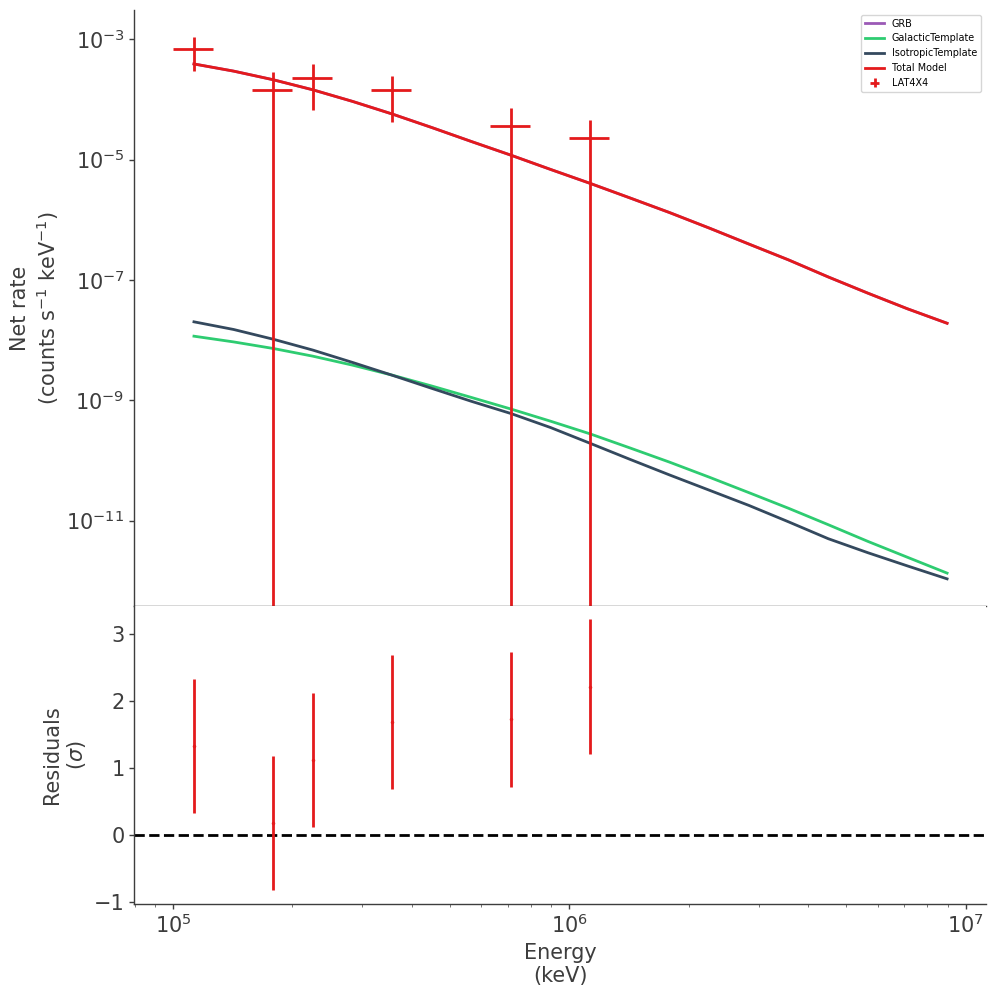

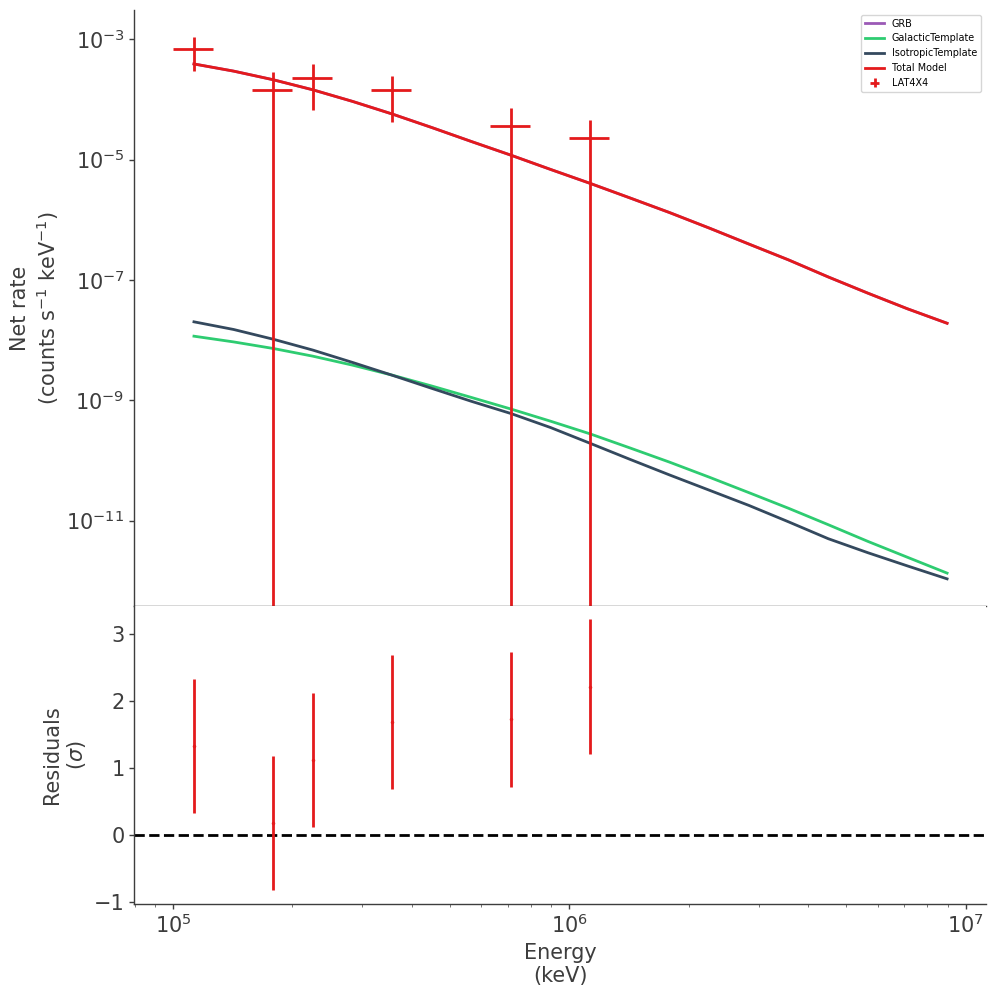

In [16]:
i = 3
T0, T1 = intervals[i], intervals[i + 1]
LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
jl = results[LAT_name]
jl.results.display()
display_spectrum_model_counts(jl, step=False, figsize=(10, 10))

We can see the evolution of the spectrum with time (not all the bins are diplayed):


20:36:16 DEBUG     adding child ra                                                                  ]8;id=94566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=236579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=49813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=853479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=330087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=842782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=229941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=692532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=748692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=552287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=247865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=158654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=546276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=913299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=409052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=615665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=845114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=624850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=372454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=767699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=17029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=955163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=873864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=627955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=230617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=571963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=900358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=944459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=687011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=984696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=70903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=4279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=859652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=798350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=999499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=715820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=737582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=668647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=791491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=31794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=473185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=95379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=220283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=518739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=175380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=627500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=620778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=831853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=760964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=144741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=663436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=15068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=181344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=677325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=504406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=43950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=554846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=701524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=770305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=498375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=966705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=334303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=825642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=246552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=92774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=690680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=80234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=797418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=504294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=567375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=826572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=14783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=405231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=979488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=342289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=794789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=884302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=959799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=910533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=978767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=177777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=881669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=947746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=665444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=114283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=220320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=666495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=468449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=717829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=431266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=500356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=125640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=686541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=898022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=64643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=883119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=10092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=954561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=275857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=234182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=224668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=428077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=164693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=438103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=108557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=61110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=447645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=159053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=180616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=263299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=813620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=251257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

20:36:17 DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=58408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=973425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=11947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=731075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=120359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=246043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=129945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=337977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=942745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=711054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=48700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=711325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=691484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=733475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=809227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=907755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=747585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=142907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=334888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=875761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=315899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=228833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=274647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=569147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=130082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=899863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=63321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=304840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=809551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=430744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=901803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=203703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=622189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=252957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=441127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=562305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=271748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=304761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=399018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=160966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=61973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=77105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=535606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=949783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=541849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=261107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=728898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=725608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=963849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=157161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=694337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=80840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=721804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=224654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=136773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=524983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=924709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=632790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=926413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=911539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=376571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=692732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=644979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=775562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=702149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=277962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=429269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=573106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=572093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=442565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=56318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=965852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=875847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=662408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=796632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=247314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=877584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=42827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=863945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=794884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=248739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=801024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=42007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=611405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=333008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=295754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=995616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=592933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=142943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=377071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=416428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=52269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=384446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=216209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=187827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=768215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=644748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=776570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=535119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=503851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=545766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=870127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=980832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=762990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=317408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=930616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=806006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=790147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=916329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=373123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=976073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=184458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=453416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=739087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=182674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=11904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=874482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=312363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=749925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=627425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=120188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=168858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=863790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=60901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=480250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=341529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=522738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=90979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=848520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=809985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=138398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=945422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=955981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=480549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=996074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=593587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=455073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=767330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=527055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=838593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=894868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=4178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=278799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=817079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=7681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=29294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=625240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=457411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=626102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=28970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=380229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=836073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=756159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=806097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=206814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=376694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=827461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=535510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=541149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=820759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=305532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=242981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=233102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=373688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=869573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=884349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=168334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=313875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=584998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=677530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=596757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=568490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=166305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=702028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=322899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=747825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=269257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=542320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=881957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=280786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=817241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=716151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=843471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=163155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=568873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=705408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=372542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=785928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=49500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=386293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=483135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=339859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=106321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=375197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=785222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=574280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=630046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=162802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=106409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=647999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=760942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=22570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=343134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=299423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=228272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=556319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=877728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=626432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=666490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=315270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=783759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=544092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=259386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=986742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=611653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=638323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=838314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=304096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=204453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=177244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=179864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=360303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=928869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=719281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=466127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=408702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=72810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=932629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=829277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=829310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=233247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=64123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=645219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=802345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=839059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=557484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=176931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=377171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=174126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=918788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=29956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=359229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=46066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=228009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=218462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=367222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=42069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=318123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=63140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=107016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=501040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=622408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=318044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=468737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=772171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=169110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=507481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=677910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=380958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=164577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=646021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=728243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=161327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=418822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=119257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=543057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=713504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=958172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=634014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=264359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

processing MLE analyses:   0%|          | 0/13 [00:00<?, ?it/s]

         DEBUG     adding child ra                                                                  ]8;id=529475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=148990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=720058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=794695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=479493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=815237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=315708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=431666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=366315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=150100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=191384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=88566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=170519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=17316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=112029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=297235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=641173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=659134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=63380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=786901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=744130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=321676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=140591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=807396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=897385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=160364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=25463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=271779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:36:28 DEBUG     adding child ra                                                                  ]8;id=152070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=312323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=835438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=295587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=802946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=836647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=608927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=639052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=901619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=441052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=319577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=389464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=776945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=422852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=843496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=837245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=884153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=448445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=527941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=16965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=265590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=22139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=550613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=13704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=837961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=798465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=285906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=787041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=917643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=153113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=115596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=770134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:36:40 DEBUG     adding child ra                                                                  ]8;id=955707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=440290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=905147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=669389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=809552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=75766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=426548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=228490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=272357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=723441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=469390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=178326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=916715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=100503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=2018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=396240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=887310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=834730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=761908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=957195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=160250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=3473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=905907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=194502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=121095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=149991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=705729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=41804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=42909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=994454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:37:01 DEBUG     adding child ra                                                                  ]8;id=273856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=581242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=73329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=424726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=266665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=423384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=369962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=585604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=998204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=16598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=809254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=591633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=688883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=32249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=739444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=178783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=843940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=230370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=691552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=299212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=955092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=638828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=319257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=302155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=761924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=654682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=800045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=15749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=498585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=684316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=836968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:37:22 DEBUG     adding child ra                                                                  ]8;id=394008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=156122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=771177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=662247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=815167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=463248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=895174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=428124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=337201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=186166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=573841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=145623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=193407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=440611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=894296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=8773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=751652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=70705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=619579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=136761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=806201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=843280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=996629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=689842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=563149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=289192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=975139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=811628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:37:44 DEBUG     adding child ra                                                                  ]8;id=640937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=395565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=73270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=452829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=134004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=847565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=884414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=600498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=732754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=301152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=598602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=63155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=496423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=829230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=915457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=39663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=751085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=549363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=12079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=323284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=776080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=79111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=679658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=103798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=638010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=101708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=777116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=180034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:38:05 DEBUG     adding child ra                                                                  ]8;id=763895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=454523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=791479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=104757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=836777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=621902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=767454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=856218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=545425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=110596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=552665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=80893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=588511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=695356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=5827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=210284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=774383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=181352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=204442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=491321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=386854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=384722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=709023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=216108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=757890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=932158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=939158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=883769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=767275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=688654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:38:22 DEBUG     adding child ra                                                                  ]8;id=196933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=288847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=676827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=740867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=300755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=300688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=264109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=149891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=393894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=636979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=456761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=153437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=43371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=820184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=108244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=561558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=443917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=630057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=928314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=38480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=51157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=894999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=157148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=715744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=654552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=109324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=868361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=755917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=514983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=805183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=737824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:38:42 DEBUG     adding child ra                                                                  ]8;id=261769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=60571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=996125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=508312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=12208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=44118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=207143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=209976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=347035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=80304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=116184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=644936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=460940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=310412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=142085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=956746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=304594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=375150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=237370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=807107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=137709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=44503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=989309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=764447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=147393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=969620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=326935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=657026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=563000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:39:03 DEBUG     adding child ra                                                                  ]8;id=445509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=43864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=463251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=875248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=968106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=99468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=834322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=549996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=174432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=310561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=936687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=137814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=627946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=2053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=870721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=749374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=188212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=1390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=346890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=862827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=643268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=278860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=395078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=481381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=86764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=325477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=560153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=393753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=341634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=570865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:39:26 DEBUG     adding child ra                                                                  ]8;id=708033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=935293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=957874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=766824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=472122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=1519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=871986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=593451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=473279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=637820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=569117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=379405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=254819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=948401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=151597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=127799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=497180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=12755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=877337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=968918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=209128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=816579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=134287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=762486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=777655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=282045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=383769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=682833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:39:48 DEBUG     adding child ra                                                                  ]8;id=538569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=736365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=675453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=59802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=996046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=53215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=108945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=892332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=622215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=156205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=637592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=359922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=282589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=613772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=198136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=340406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=269578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=917420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=945672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=312598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=761027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=711959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=336273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=214707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=401801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=180944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=678182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=7212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=660107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:40:10 DEBUG     adding child ra                                                                  ]8;id=568935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=995960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=512624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=633176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=89208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=833112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=218250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=143269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=522414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=469781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=487785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=82146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=966907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=188597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=394233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=352147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=140325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=199991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=42907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=139118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=552014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=958024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=651594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=51416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=89750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=159761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=62740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=223542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=549604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=353676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=203677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=918516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

20:40:31 DEBUG     converting MeV to MeV                                                          ]8;id=179517;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py\model_plot.py]8;;\:]8;id=813745;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py#890\890]8;;\

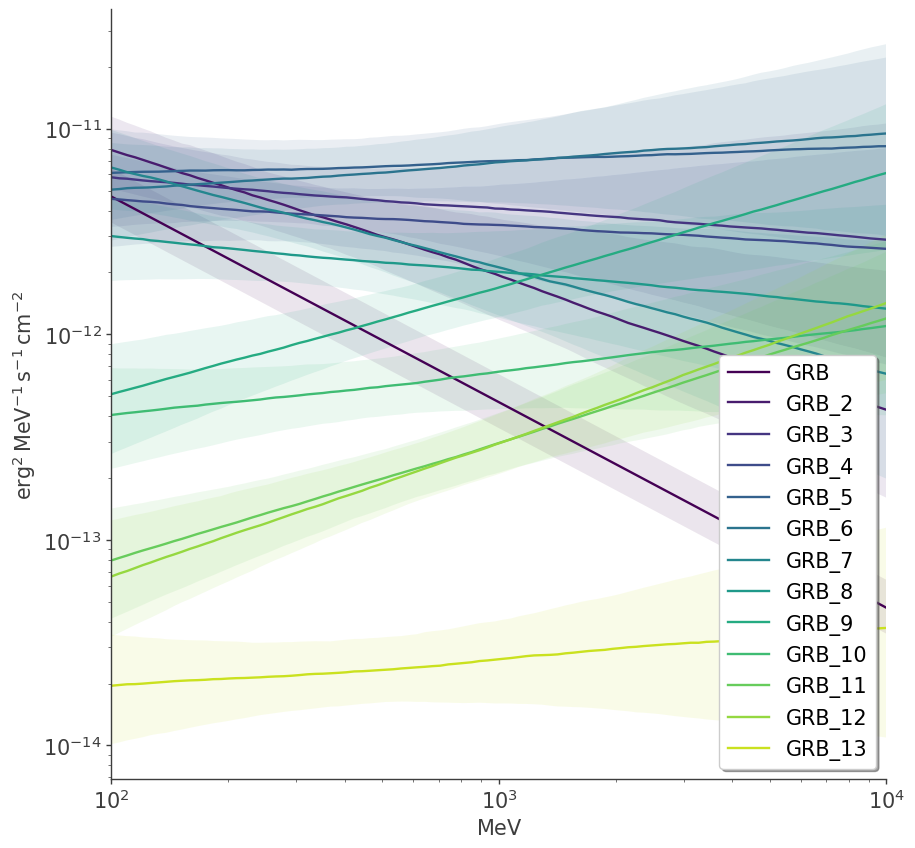

In [17]:
fig = plot_spectra(
    *[results[k].results for k in list(results.keys())[::2]],
    ene_min=100 * u.MeV,
    ene_max=10 * u.GeV,
    flux_unit="erg2/(cm2 s MeV)",
    energy_unit="MeV",
    fit_cmap="viridis",
    contour_cmap="viridis",
    contour_style_kwargs=dict(alpha=0.1)
)
fig.set_size_inches(10, 10)

Finally, we can display flux lightcurves and index evolution with time.


20:40:33 DEBUG     adding child ra                                                                  ]8;id=492283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=902980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=253569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=650611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=192436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=531903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=848328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=220095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=360695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=439463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=895043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=262135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=77606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=131632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=293325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=848610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=819602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=18233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=559786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=461031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=591063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=179965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=407893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=891854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=59329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=269241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=924437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=531682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=131690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=250543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=40646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=115978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=196842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=349468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=155763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=963756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=315699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=94911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=842655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=501682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=620025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=520641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=273515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=995578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=211420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=150470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=337976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=677704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=702357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=38852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=999131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=103268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=663190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=760522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=997997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=551921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=727915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=12647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=192836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=56879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=338069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=34692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=742917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=809710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=1628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=819582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=822698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=417952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=485378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=900410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=144666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=831867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=935895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=768385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=462515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=713297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=527246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=145792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=302784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=942074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=749385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=59665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=313569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=168870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=146027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=726790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=376831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=505282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=934958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=230338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=177307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=501005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=738670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=382496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=98047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=606765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=901687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=509596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=938561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=853700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=896723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=436044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=185687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=645280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=283442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=644579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=373287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=305011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=455653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=34783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=489035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=833876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=276602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=847953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=674318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=173804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=81389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=505990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=737029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=411202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=210935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=237936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=341650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=777189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=210002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=728917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=981171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=565049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=542297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=815432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=161288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=719794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=490139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=236905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=59968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=757434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=828466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=988589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=481642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=749404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=694149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=950604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=866267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=458186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=730965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=746346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=703753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=604191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=777987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=892581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=316365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=774392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=800685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=184752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=939512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=449021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=842869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=399737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=592114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=526107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=603523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=503087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=214133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=64804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=141352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=116562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=528633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=611698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=623268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=217715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=386154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=817367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=141256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=166192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=884257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=879046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=353801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=959017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=856503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=712968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=4666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=245688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=406296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=190124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=849461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=115484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=260832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=128837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=895255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=408734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=736559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=482055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=375252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=359518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=119173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=883763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=799640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=217636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=950275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=223644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=858651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=681970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=350324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=197238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=896092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=539228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=477637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=733145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=747240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=103647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=312005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=412075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=80229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=154744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=674862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=575466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=201121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=349564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=334356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=95642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=499667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=89165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=12488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=153651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=624396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=490135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=123228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=394857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=69741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=537226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=131927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=983835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=423814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=79398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=79997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=358779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=731380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=932798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=269668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=193614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=492447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=993049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=452998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=205213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=356861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=229308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=686938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=559087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=427864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=794308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=787560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=204574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=283730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=946525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=55469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=215294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=182223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=63221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=509282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=797928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=217664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=35600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=15859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=394729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=814396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=223608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=847339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=945618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=12496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=488033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=569337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=79339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=480324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=303038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=503211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=437146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=461393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=300616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

20:40:34 DEBUG     adding child Powerlaw_flux                                                       ]8;id=971738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=609502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=627219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=257147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=940314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=620539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=629142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=769139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=775531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=769226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=840785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=837491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=323593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=468135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=810495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=533387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=386777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=165850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=375844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=756458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=417170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=276888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=785818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=516305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=793995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=9103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=304278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=976421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=713226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=374203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=928944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=436620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=407620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=120017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=436240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=679681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=550454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=608616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=605355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=980181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=792151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=123468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=22909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=451403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=749976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=544690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=263644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=110041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=338281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=146170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=660711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=858507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=769561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=800448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=984231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=922757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=84666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=982383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=766977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=241931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=806368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=703545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=780379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=378833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=303672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=421514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=317074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=450523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=94764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=249616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=510528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=50070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=539511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=653096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=236610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=577089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=183657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=991607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=334597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=712866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=308863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=631037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=862228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=948089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=388043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=143609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=345039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=664459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=658975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=190260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=299108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=580308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=829528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=665172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=149874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=348162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=673617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=798536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=607022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=595634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=357429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=16985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=756891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=430575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=338785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=990029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=994019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=847159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=899853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=14493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=770317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=703774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=542050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=306688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=581123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=242444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=188712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=953713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=432836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=585334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=995751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=247614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=117116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=807268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=185806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=271658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=359526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=901659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=868253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=75217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=70838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=833067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=484676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=927591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=946571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=390240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=980378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=221390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=860799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=260226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=540406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=926747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=710401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=238737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=302020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=345409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=152754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=327473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=906794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=143387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=935184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=46223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=55412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=658480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=198073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=839982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=641647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=345469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=7793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=304404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=925883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=147313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=395235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=289711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=825142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=842166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=826253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=570165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=799526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=842494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=282448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=850539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=246749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=616846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=737320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=791165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=96558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=724830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=738109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=885564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=72122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=418021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=830293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=289863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=606011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=725115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=602392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=439199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=762226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=747635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=636821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=145460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=503049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=442886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=624641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=536974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=960980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=705507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=862754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=493726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=1064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=979834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=364382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=130182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=168177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=380095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=763766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=192884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=525965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=761748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=858959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=825476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=767858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=209480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=658787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=927460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=697911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=685119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=992042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=940532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=937601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=783620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=566240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=30593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=76139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=385141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=509520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=845004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=690260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=746173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=449274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=213765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=825409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=248798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=165823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=543588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=309047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=110551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=870571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=669265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=304065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=546656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=261244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=936261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=465836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=798141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=819094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=505183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=22670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=514601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=962316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=630936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=471032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=163375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=790869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=972783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=480354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=207453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=780134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=275654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=77147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=706952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=48435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=565226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=690467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=770084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=330045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=234175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=674509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=66193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=70310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=197476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=501631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=676581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=896588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=340700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=906736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=950908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=997554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=876865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=289754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=593003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=884769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=427425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=275465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=98596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=381900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=148679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=459209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=523638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=571693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=883437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=368360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=663839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=789544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=975954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=631507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=234963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=91238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=233020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=86298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=331299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=415883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=309135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=419940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=887185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=19843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=651699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=12197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=959022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=217079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=228688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=235553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=603117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=444388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=696296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=501687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=57545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=803810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=184506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=928803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=715287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=385375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=574895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=667545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=297500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=130162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=739338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=984882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=800948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=227001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

20:40:35 DEBUG     path is now: GRB.position                                                       ]8;id=560512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=232880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=482465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=723030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=941439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=239997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=184116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=226377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=314930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=293842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=513508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=7326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=939630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=433699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=822559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=462584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=892016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=298085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=990489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=815556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=239796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=132221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=921406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=394305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=628100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=533517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=770503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=611171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=176196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=782835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=845502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=618121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=431503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=297522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=333565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=274322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=544474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=357556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=984011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=119675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=475226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=541111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=164240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=591841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=730386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=33624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=6692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=952938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=842481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=264883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=283001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=316257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=97267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=758427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=556073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=5522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=81555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=124691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=311372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=730566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=47820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=910615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=614698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=602669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=830134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=462508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=162908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=751674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=682427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=557004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=240087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=432934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=80763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=243567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=461189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=605691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=576936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=325713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=224274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=218382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=447121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=306312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=363918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=856963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=819388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=369704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=141537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=506379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=497119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=162586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=518813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=856893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=206857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=251021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=425788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=865576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=46272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=201498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=657496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=309865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=238193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=988784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=168450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=420344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=94680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=614013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=394396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=252172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=925216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=504920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=563567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=229452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=375816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=725739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=973940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=36469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=901765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=665620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=233781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=422853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=323240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=572701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=501806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=375801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=315923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=520252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=313907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=385871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=510300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=931467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=719241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=459981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

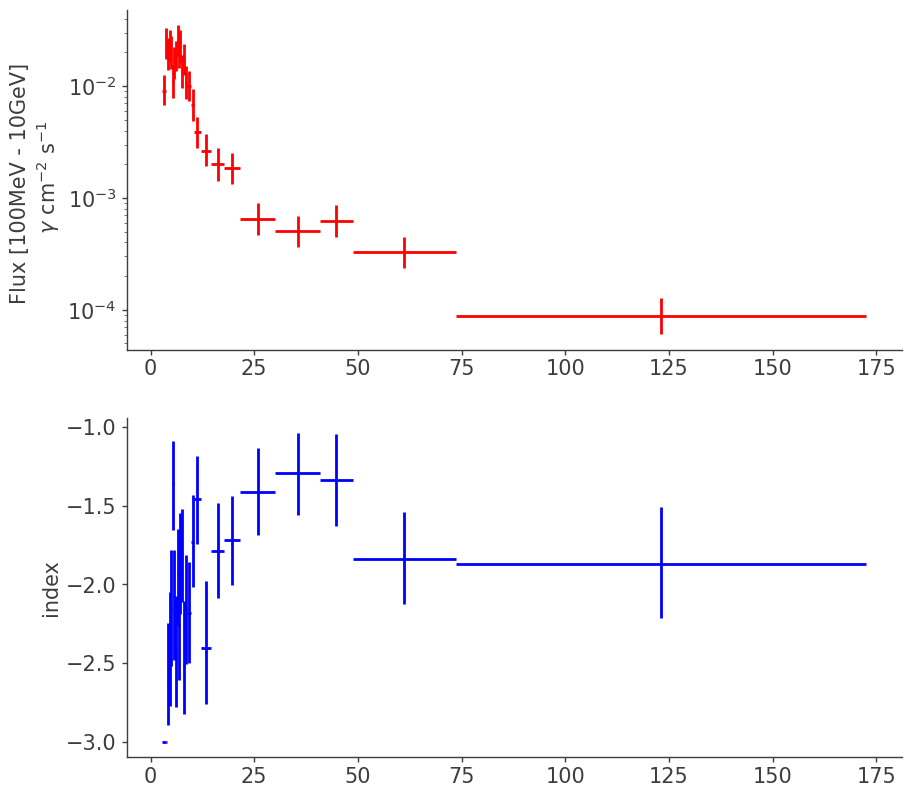

In [18]:
variates = ["F", "index"]
y = {}
for n in variates:
    y[n] = []
    y[n + "_p"] = []
    y[n + "_n"] = []
x = []
dx = []


for T0, T1 in zip(intervals[:-1], intervals[1:]):
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    x.append((T1 + T0) / 2)
    dx.append((T1 - T0) / 2)
    jl = results[LAT_name]
    res = jl.results
    mod = res.optimized_model
    ps = mod.point_sources

    for n in variates:
        my_variate = res.get_variates("GRB.spectrum.main.Powerlaw_flux.%s" % n)
        y[n].append(my_variate.median)
        y[n + "_p"].append(my_variate.equal_tail_interval()[1] - my_variate.median)
        y[n + "_n"].append(my_variate.median - my_variate.equal_tail_interval()[0])
        pass
    pass

fig = plt.figure(figsize=(10, 15))
colors = ["r", "b"]
ylabels = ["Flux [100MeV - 10GeV] \n $\gamma$ cm$^{-2}$ s$^{-1}$", "index"]
for i, n in enumerate(variates):
    plt.subplot(len(variates) + 1, 1, i + 1)
    plt.errorbar(x, y[n], xerr=dx, yerr=(y[n + "_n"], y[n + "_p"]), ls="", c=colors[i])
    if i == 0:
        plt.yscale("log")
    # plt.xscale('log')
    plt.ylabel(ylabels[i])
    pass